### 03_CNN_cifar10

parser = configparser.ConfigParser()  
parser.read(config_file)  
temp_data = temp_data.reshape(images_per_file,num_channels,im_dim,im_dim)  
temp_data = temp_data.transpose((0,2,3,1))  

In [1]:
#class_names = ["airplain","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
class_names = ["飛機","汽車","鳥","貓","鹿","狗","青蛙","馬","船","卡車"]

In [2]:
from tensorflow.keras import datasets, utils
import numpy as np

def normalize_data(train, test, scale=1):
    x_train,y_train = train
    x_test,y_test = test
    train_num = len(x_train) // scale
    test_num = len(x_test) // scale
    x_train, y_train = x_train[:train_num], y_train[:train_num]
    x_test, y_test = x_test[:test_num], y_test[:test_num]
    x_train = x_train.astype(np.float32) / 255.
    x_test = x_test.astype(np.float32) / 255.
    y_train = utils.to_categorical(y_train)#.astype(np.int32)
    y_test = utils.to_categorical(y_test)#.astype(np.int32)
    
    print("train", x_train.shape, y_train.shape)
    print("test", x_test.shape, y_test.shape)

    return (x_train,y_train),(x_test,y_test)

(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
print("train", x_train.shape, y_train.shape)
print("test", x_test.shape, y_test.shape)
(x_train,y_train),(x_test,y_test) = normalize_data((x_train,y_train),(x_test,y_test),scale=10)

train (50000, 32, 32, 3) (50000, 1)
test (10000, 32, 32, 3) (10000, 1)
train (5000, 32, 32, 3) (5000, 10)
test (1000, 32, 32, 3) (1000, 10)


In [5]:
from tensorflow.keras import layers, models
from tensorflow import keras
model = models.Sequential()
model.add(keras.Input(shape=(32,32,3), name="inputs"))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", name="conv_1"))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same", name="pool_1"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", name="conv_2"))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same", name="pool_2"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", name="conv_3"))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding="same", name="pool_3"))
model.add(layers.BatchNormalization())
model.add(layers.Flatten(name="flatten"))
model.add(layers.Dropout(rate=0.3, name="drop_1"))
model.add(layers.Dense(units=10, activation="softmax", name="outputs"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv_2 (Conv2D)              (None, 16, 16, 64)        18496     
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv_3 (Conv2D)              (None, 8, 8, 128)         7

In [6]:
history = model.fit(x_train, y_train, epochs=6, batch_size=128, validation_data=(x_test,y_test), verbose=1)

Train on 5000 samples, validate on 1000 samples
Epoch 1/6
5000/5000 [==============================] - 10s 2ms/sample - loss: 2.1555 - accuracy: 0.3276 - val_loss: 2.1485 - val_accuracy: 0.1970
Epoch 2/6
5000/5000 [==============================] - 7s 1ms/sample - loss: 1.6643 - accuracy: 0.4444 - val_loss: 2.2654 - val_accuracy: 0.1910
Epoch 3/6
5000/5000 [==============================] - 7s 1ms/sample - loss: 1.4268 - accuracy: 0.5074 - val_loss: 2.5127 - val_accuracy: 0.1260
Epoch 4/6
5000/5000 [==============================] - 7s 1ms/sample - loss: 1.2186 - accuracy: 0.5814 - val_loss: 2.6445 - val_accuracy: 0.1260
Epoch 5/6
5000/5000 [==============================] - 7s 1ms/sample - loss: 1.0827 - accuracy: 0.6252 - val_loss: 2.5656 - val_accuracy: 0.1330
Epoch 6/6
5000/5000 [==============================] - 7s 1ms/sample - loss: 0.9985 - accuracy: 0.6514 - val_loss: 3.1211 - val_accuracy: 0.1180


In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

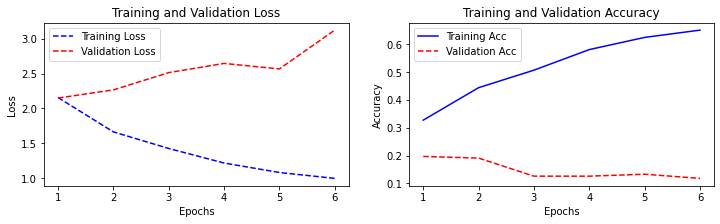

In [11]:
import matplotlib.pyplot as plt 
def visual_train_status(history):
        plt.figure(figsize=(12,3))
        loss = history.history["loss"]
        val_loss = history.history["val_loss"]
        epochs = range(1, len(loss)+1)  
        plt.subplot(1,2,1)
        plt.plot(epochs, loss, "b--", label="Training Loss")
        plt.plot(epochs, val_loss, "r--", label="Validation Loss")
        plt.title("Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        
        # 顯示訓練和驗證準確度
        acc = history.history["accuracy"]
        val_acc = history.history["val_accuracy"]
        epochs = range(1, len(acc)+1)
        plt.subplot(1,2,2)
        plt.plot(epochs, acc, "b-", label="Training Acc")
        plt.plot(epochs, val_acc, "r--", label="Validation Acc")
        plt.title("Training and Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
        
visual_train_status(history)

[1 1 6 8 8 6 7 6 1 1]
Label	
['貓', '船', '船', '飛機', '青蛙', '青蛙', '汽車', '青蛙', '貓']	
Preds	
['汽車', '汽車', '青蛙', '船', '船', '青蛙', '馬', '青蛙', '汽車', '汽車']	

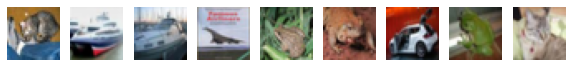

In [19]:
labels = np.argmax(y_test[0:9], axis=1)
predictions = model.predict(x_test[0:9])
predictions = np.argmax(predictions, axis=0)
print(predictions)
print("Label\t")
print([class_names[index] for index in labels], end="\t")
print("\nPreds\t")
print([class_names[index] for index in predictions], end="\t")

plt.figure(figsize=(10,1))
for i in range(0,9):
    plt.subplot(1,9, (i+1))
    plt.imshow(x_test[i])
    plt.axis("off")
plt.show()

In [29]:
score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
print("loss:{:.6f}\taccuracy:{:.6f}".format(score[0],score[1]))

loss:3.121090	accuracy:0.118000
